# Proyecto 2: Análisis Inicial y Selección de Problema

### **Objetivo:** Realizar un análisis exploratorio de datos (EDA) inicial para al menos cuatro conjuntos de datos, diagnosticar y elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción). Entregar un repositorio con el dataset elegido, el EDA inicial y la problemática seleccionada.

### Parte I: Búsqueda y Análisis de Conjuntos de Datos

## Instrucciones

### Búsqueda de Conjuntos de Datos:

- Buscar al menos cuatro conjuntos de datos en plataformas como Kaggle, UCI Machine Learning Repository o cualquier otra fuente confiable.
- Asegurarse de que los conjuntos de datos seleccionados sean diversos y cubran diferentes dominios y tipos de datos.

### [**S&P 500 Stocks**](https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks)
  - Create a time series regression model to predict S&P value and/or stock prices.
Explore the most the returns, components and volatility of the S&P 500 index.
Identify high and low performance stocks among the list. 
  - The Standard and Poor's 500 or S&P 500 is the most famous financial benchmark in the world.

  - This stock market index tracks the performance of 500 large companies listed on stock exchanges in the United States. As of December 31, 2020, more than $5.4 trillion was invested in assets tied to the performance of this index.

  - Because the index includes multiple classes of stock of some constituent companies—for example, Alphabet's Class A (GOOGL) and Class C (GOOG)—there are actually 505 stocks in the gauge.

#### Análisis Exploratorio de Datos (EDA) Inicial:
- Realizar un EDA inicial para cada uno de los cuatro conjuntos de datos seleccionados.
- Incluir visualizaciones, análisis estadístico descriptivo, identificación de valores nulos y outliers.
- Documentar los hallazgos de cada EDA en un notebook de Jupyter.

#### Diagnóstico y Selección de Problema:
- Basándose en el EDA inicial, diagnosticar las principales características y desafíos de cada conjunto de datos.
- Elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción).
- Justificar la elección del problema y explicar por qué es relevante y desafiante.



### Análisis Estadístico Descriptivo:

- Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.) para las variables numéricas.
- Analizar la distribución de las variables categóricas.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../datasets/sp500_companies.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             503 non-null    object 
 1   Symbol               503 non-null    object 
 2   Shortname            503 non-null    object 
 3   Longname             503 non-null    object 
 4   Sector               503 non-null    object 
 5   Industry             503 non-null    object 
 6   Currentprice         503 non-null    float64
 7   Marketcap            503 non-null    int64  
 8   Ebitda               474 non-null    float64
 9   Revenuegrowth        500 non-null    float64
 10  City                 503 non-null    object 
 11  State                483 non-null    object 
 12  Country              503 non-null    object 
 13  Fulltimeemployees    494 non-null    float64
 14  Longbusinesssummary  503 non-null    object 
 15  Weight               503 non-null    flo

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,232.87,3520016154624,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.063134
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,136.02,3331129868288,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059747
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,418.79,3113653370880,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.055846
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,201.45,2118246727680,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.037993
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,167.65,2062396817408,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.036991


In [4]:
df.describe()

,Currentprice,Marketcap,Ebitda,Revenuegrowth,Fulltimeemployees,Weight
count,503.000000,5.030000e+02,4.740000e+02,500.000000,4.940000e+02,503.000000
mean,232.080020,1.108435e+11,7.031397e+09,0.070484,5.774496e+04,0.001988
std,527.844299,3.218251e+11,1.622777e+10,0.180071,1.394693e+05,0.005772
min,9.060000,6.036322e+09,-3.991000e+09,-0.602000,2.800000e+01,0.000108
25%,71.760000,2.058780e+10,1.623194e+09,0.002000,1.020000e+04,0.000369
50%,130.710000,3.824682e+10,2.941705e+09,0.050000,2.159500e+04,0.000686
75%,240.945000,8.450537e+10,6.017250e+09,0.109000,5.476225e+04,0.001516
max,9293.060000,3.520016e+12,1.495470e+11,1.632000,2.100000e+06,0.063134


In [5]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


In [6]:
#Transformar las columnas de tipo 'object' a 'category'
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].astype('category')
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Exchange             503 non-null    category
 1   Symbol               503 non-null    category
 2   Shortname            503 non-null    category
 3   Longname             503 non-null    category
 4   Sector               503 non-null    category
 5   Industry             503 non-null    category
 6   Currentprice         503 non-null    float64 
 7   Marketcap            503 non-null    int64   
 8   Ebitda               474 non-null    float64 
 9   Revenuegrowth        500 non-null    float64 
 10  City                 503 non-null    category
 11  State                483 non-null    category
 12  Country              503 non-null    category
 13  Fulltimeemployees    494 non-null    float64 
 14  Longbusinesssummary  503 non-null    category
 15  Weight               50

In [7]:
#Codigo para detectar outliers usando el IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Return True for outliers
    return (data < lower_bound) | (data > upper_bound)

In [8]:
#Verificamos los tipos de variables numéricas
numerical_columns = df.select_dtypes(include=[np.number]).columns
numerical_columns

Index(['Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth',
       'Fulltimeemployees', 'Weight'],
      dtype='object')

In [9]:
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in numerical_columns:
    outliers = detect_outliers_iqr(df[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': df[column][~outliers].min(),
        'Upper Bound': df[column][~outliers].max()
    }

# Save the summary to a CSV file
outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
Currentprice,39.0,7.753479,9.060000e+00,4.940300e+02
Marketcap,53.0,10.536779,6.036322e+09,1.777158e+11
Ebitda,49.0,9.741551,-3.991000e+09,1.258100e+10
Revenuegrowth,42.0,8.349901,-1.520000e-01,2.670000e-01
Fulltimeemployees,50.0,9.940358,2.800000e+01,1.200000e+05
Weight,53.0,10.536779,1.082665e-04,3.187482e-03


       Currentprice     Marketcap        Ebitda  Revenuegrowth  \
count    503.000000  5.030000e+02  4.740000e+02     500.000000   
mean     232.080020  1.108435e+11  7.031397e+09       0.070484   
std      527.844299  3.218251e+11  1.622777e+10       0.180071   
min        9.060000  6.036322e+09 -3.991000e+09      -0.602000   
25%       71.760000  2.058780e+10  1.623194e+09       0.002000   
50%      130.710000  3.824682e+10  2.941705e+09       0.050000   
75%      240.945000  8.450537e+10  6.017250e+09       0.109000   
max     9293.060000  3.520016e+12  1.495470e+11       1.632000   

       Fulltimeemployees      Weight  
count       4.940000e+02  503.000000  
mean        5.774496e+04    0.001988  
std         1.394693e+05    0.005772  
min         2.800000e+01    0.000108  
25%         1.020000e+04    0.000369  
50%         2.159500e+04    0.000686  
75%         5.476225e+04    0.001516  
max         2.100000e+06    0.063134  


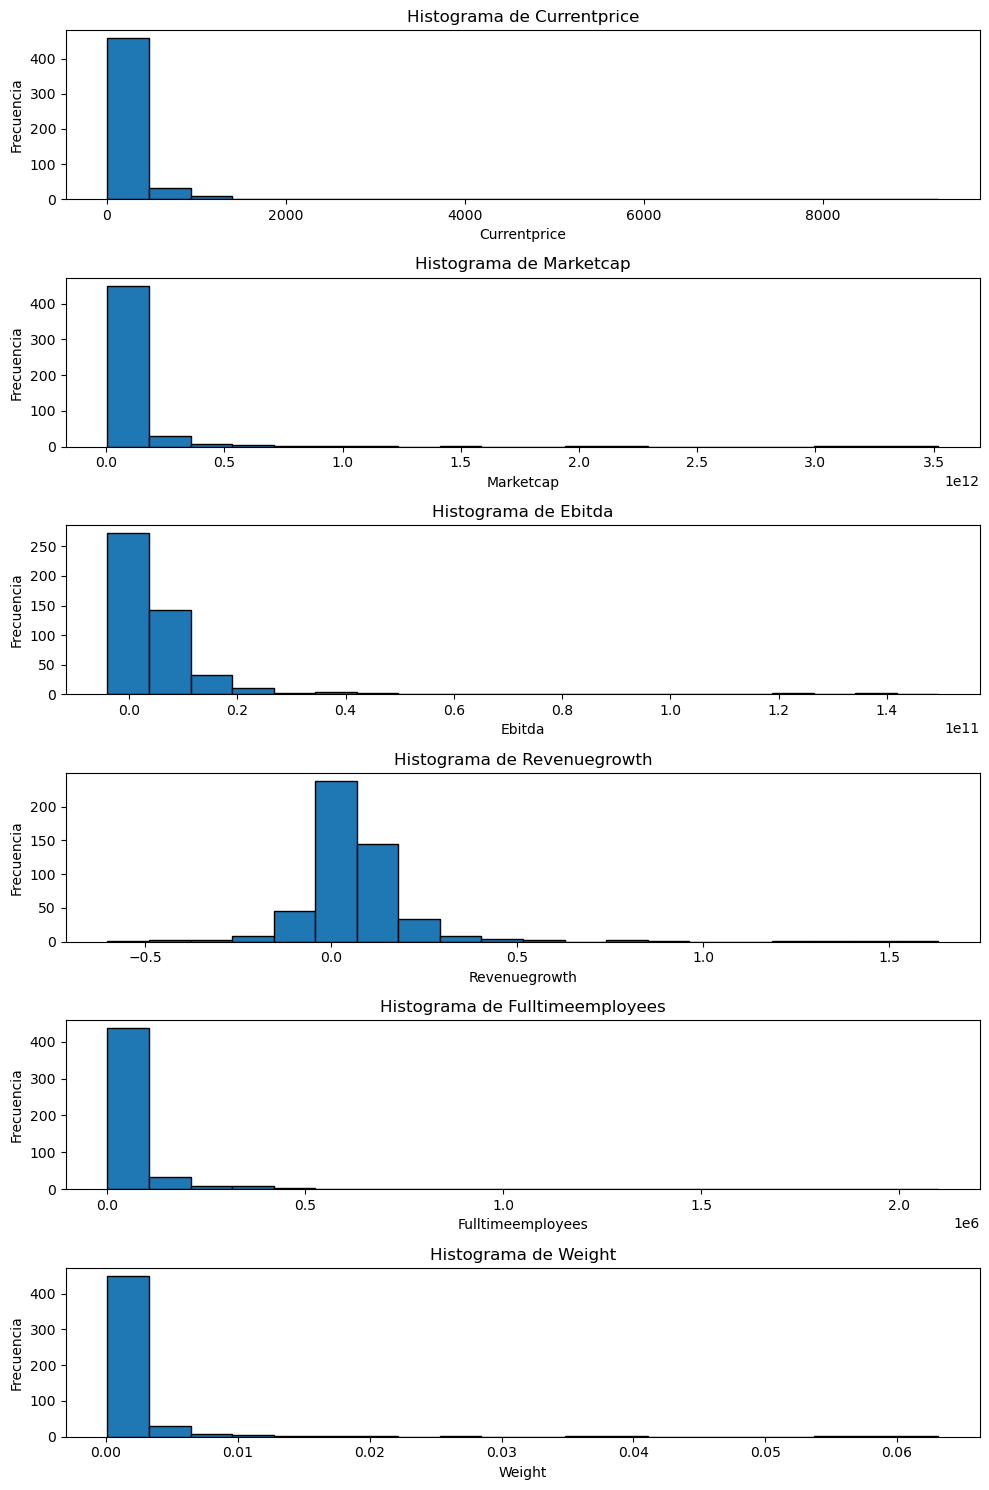

In [11]:
print(df[numerical_columns].describe())

# Configuración del tamaño de la gráfica
plt.figure(figsize=(10, 15))

# Crear un histograma para cada columna numérica
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    plt.hist(df[column].dropna(), bins=20, edgecolor='black')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


### Visualizaciones:

- Crear visualizaciones para entender la distribución de las variables (histogramas, gráficos de barras, box plots, etc.).
- Visualizar las correlaciones entre variables (mapa de calor de correlación).


Text(0.5, 1.0, 'Heatmap Detallado de Correlaciones')

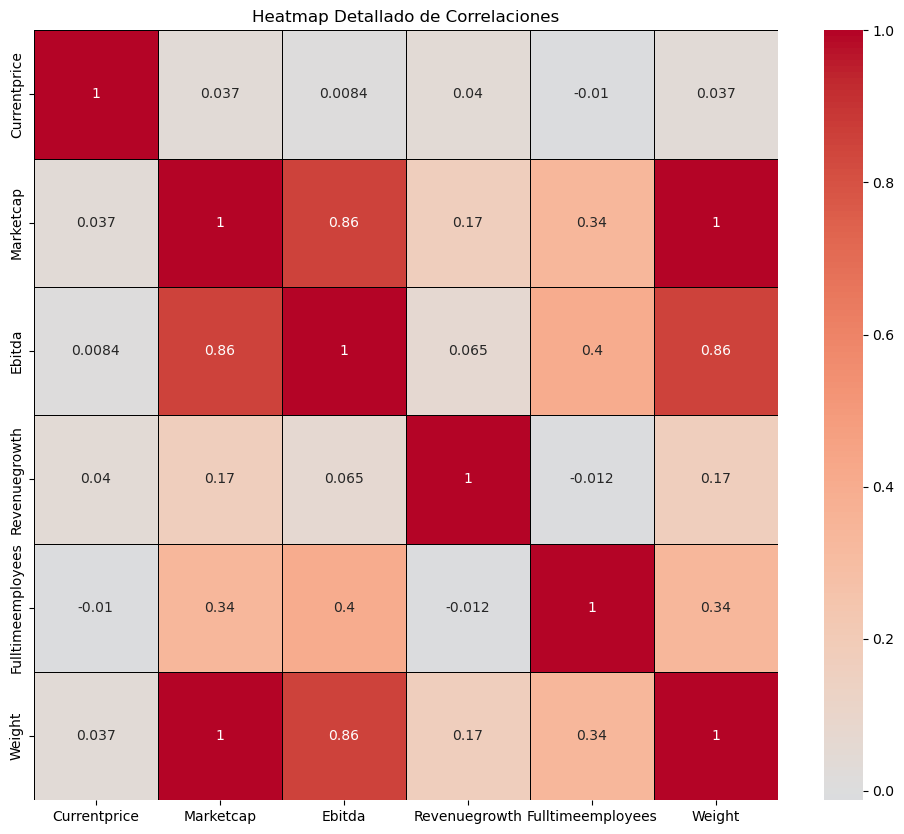

In [32]:
plt.figure(figsize=(12, 10)) 
sns.heatmap(df[['Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'Fulltimeemployees', 'Weight']].corr(), annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='black')
plt.title('Heatmap Detallado de Correlaciones')

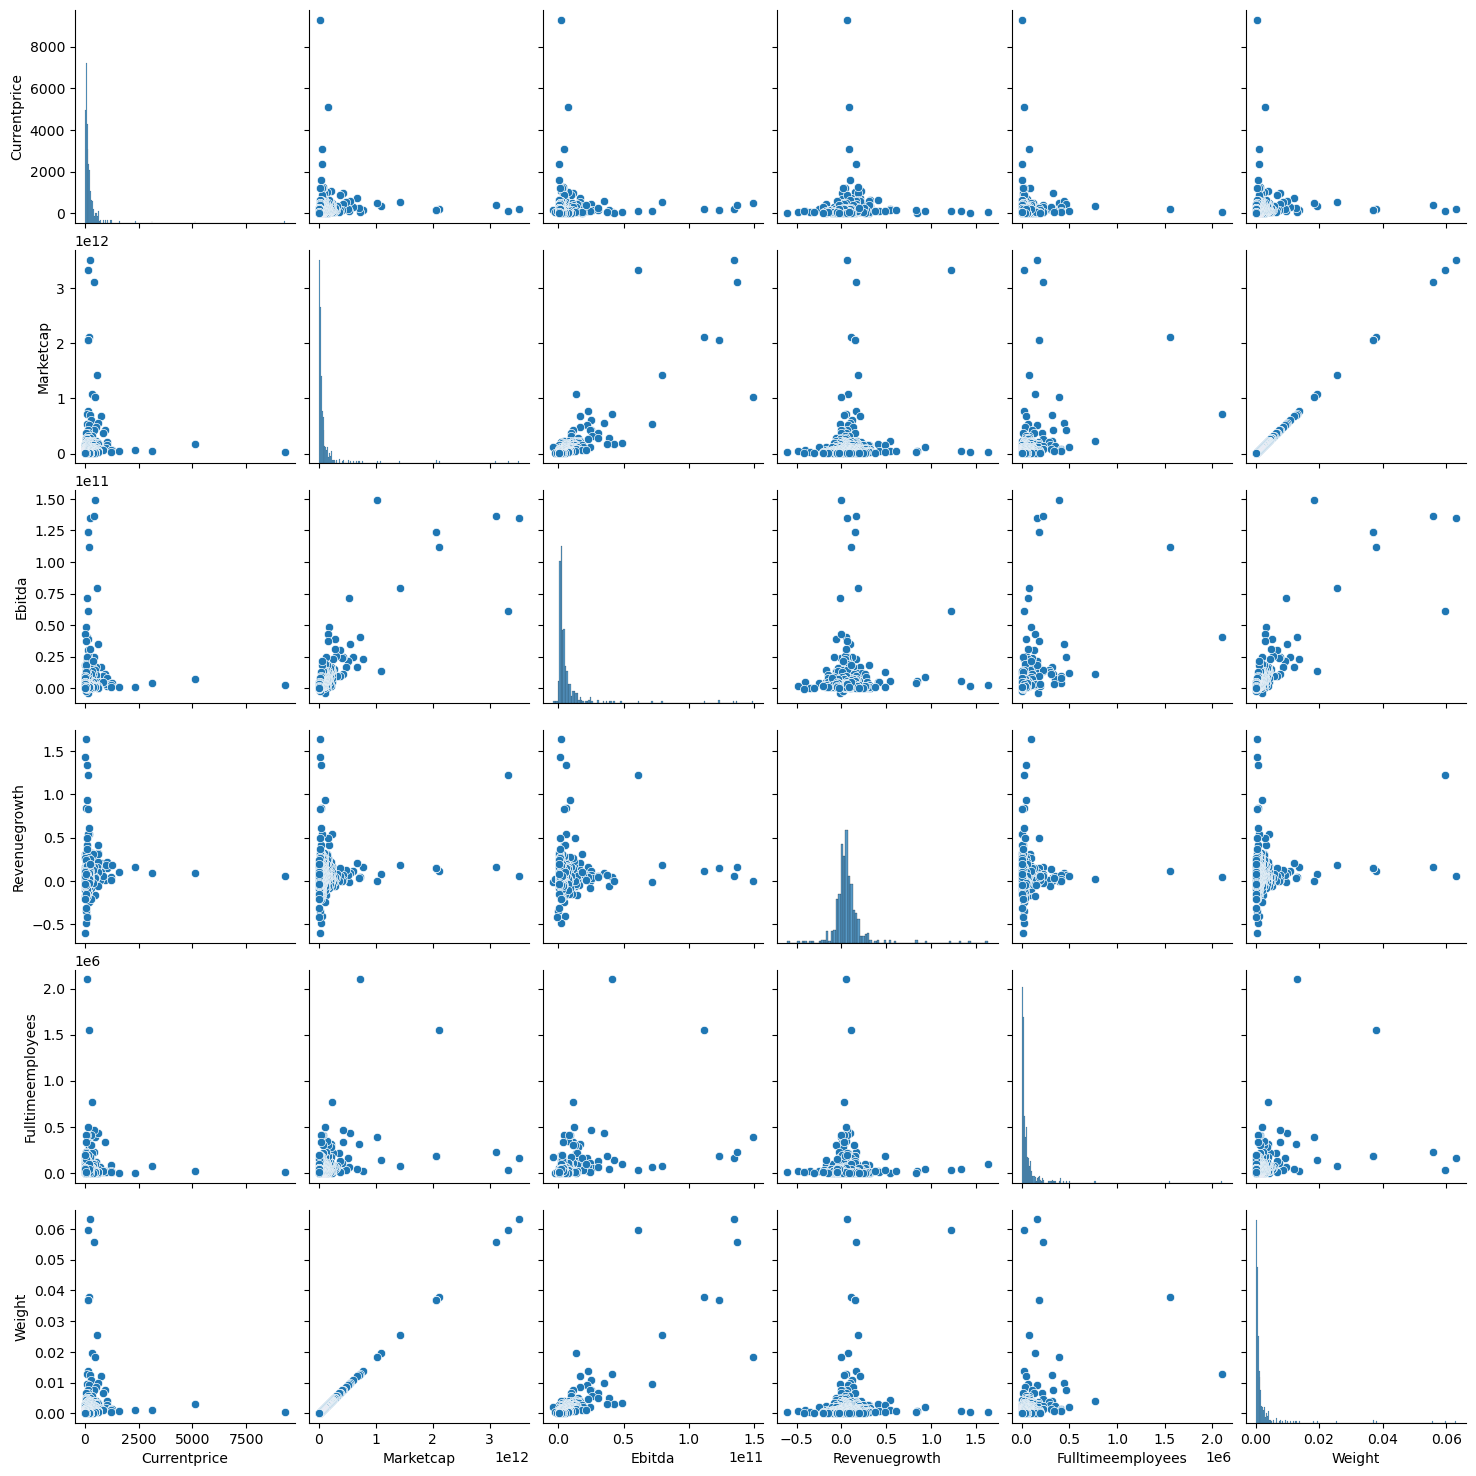

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'Fulltimeemployees', 'Weight']])
plt.show()


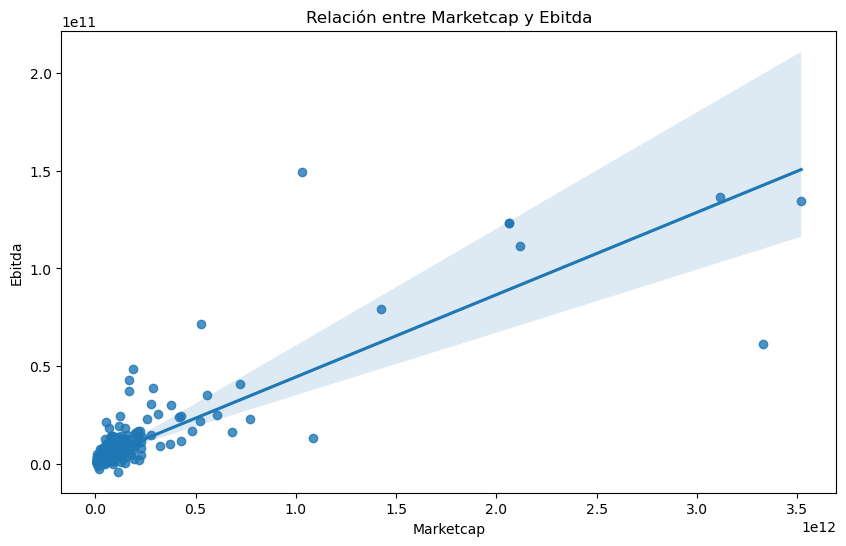

In [28]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Marketcap', y='Ebitda', data=df)
plt.title('Relación entre Marketcap y Ebitda')
plt.xlabel('Marketcap')
plt.ylabel('Ebitda')
plt.show()


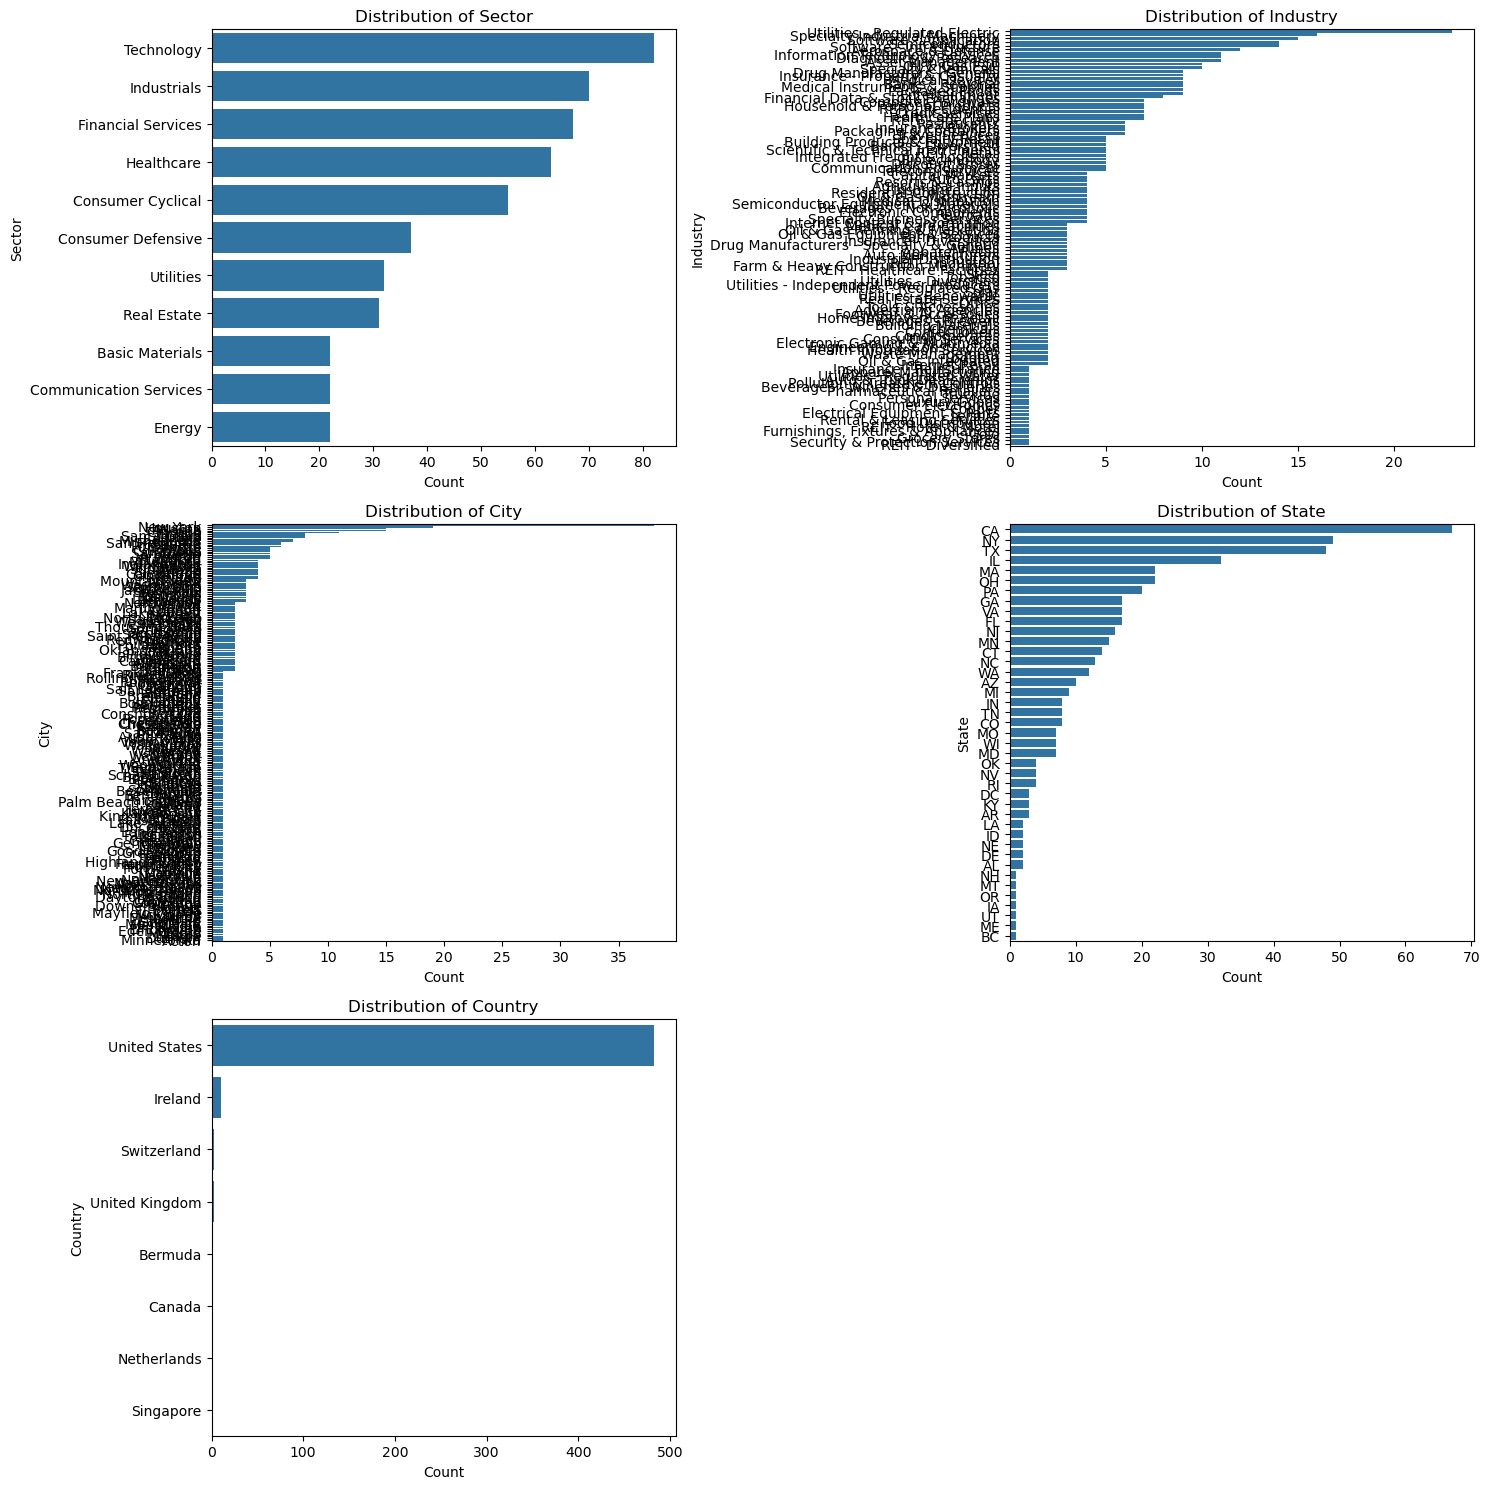

In [18]:

# Seleccionar las características categóricas
categorical_features = df[['Sector', 'Industry', 'City', 'State', 'Country']]

# Calcular el número de filas y columnas para los subplots
num_cols = 2
num_rows = (len(categorical_features.columns) + num_cols - 1) // num_cols

# Crear una figura y ejes para los subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.ravel()

# Crear un barplot para cada característica categórica
for idx, feature in enumerate(categorical_features.columns):
    sns.countplot(data=df, y=feature, ax=axes[idx], order=df[feature].value_counts().index)
    axes[idx].set_title(f'Distribution of {feature}')
    axes[idx].set_xlabel('Count')
    axes[idx].set_ylabel(feature)

# Eliminar subplots vacíos si es necesario
if len(categorical_features.columns) % num_cols != 0:
    for idx in range(len(categorical_features.columns), len(axes)):
        fig.delaxes(axes[idx])

# Ajustar el diseño del gráfico
plt.tight_layout()
plt.show()


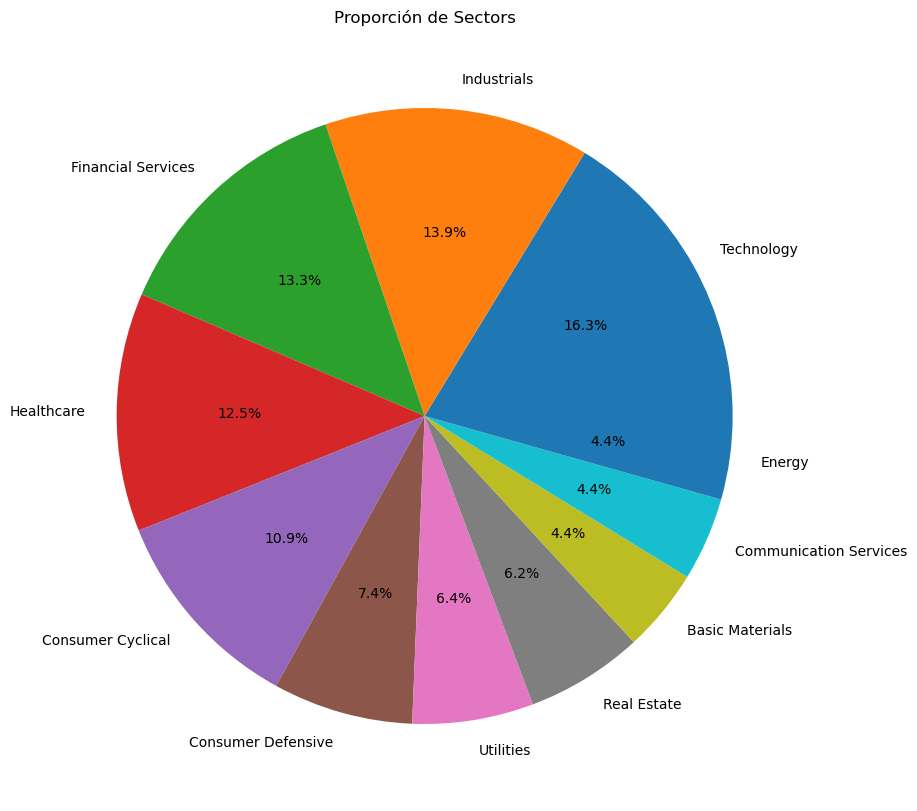

In [25]:
plt.figure(figsize=(15, 10))
(df['Sector'].value_counts(normalize=True) * 100).plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción de Sectors')
plt.ylabel('')
plt.show()


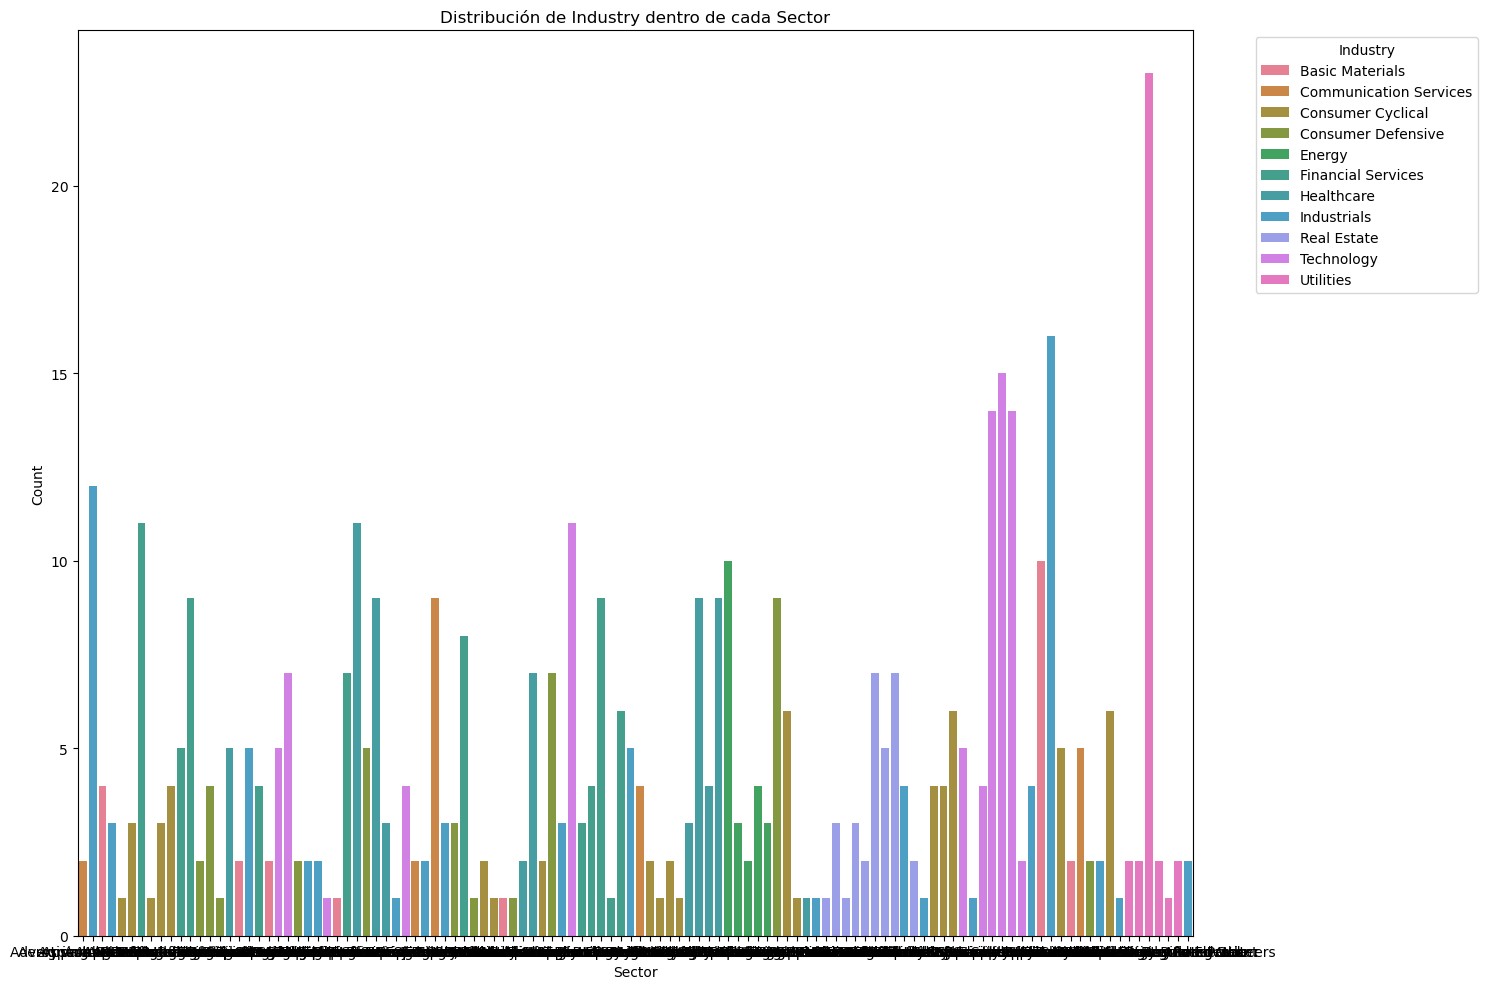

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un barplot apilado
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='Industry', hue='Sector')
plt.title('Distribución de Industry dentro de cada Sector')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


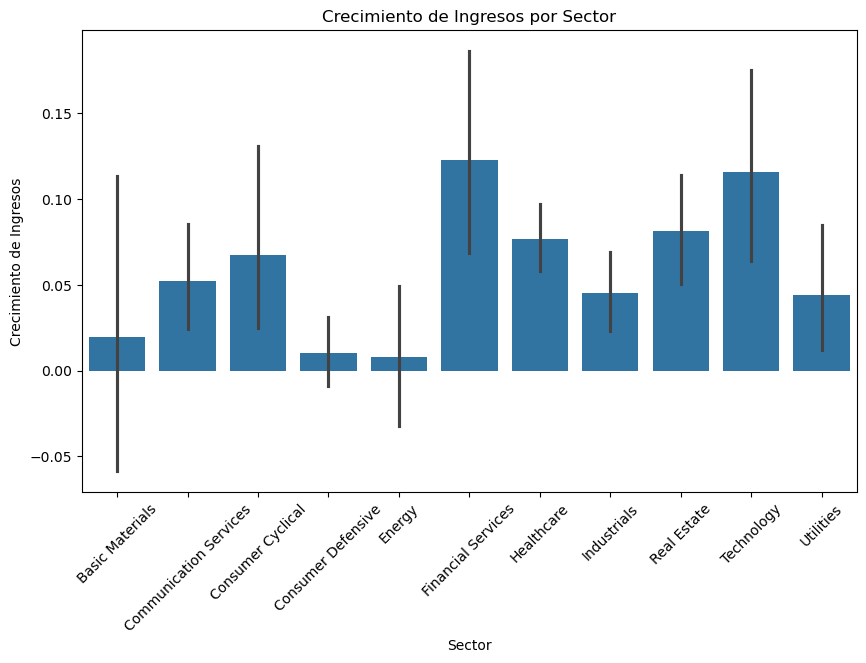

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sector', y='Revenuegrowth', data=df)
plt.title('Crecimiento de Ingresos por Sector')
plt.xlabel('Sector')
plt.ylabel('Crecimiento de Ingresos')
plt.xticks(rotation=45)
plt.show()


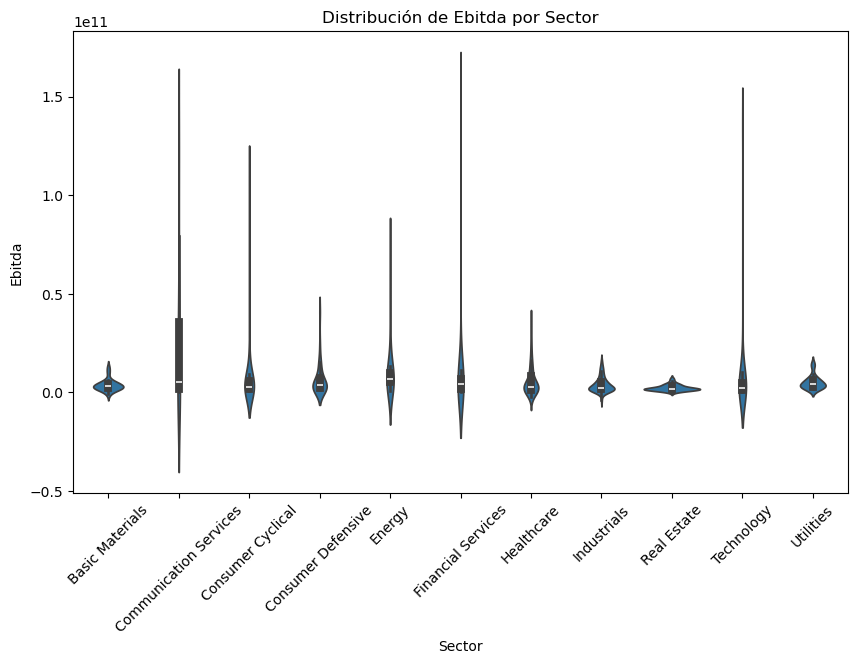

In [31]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sector', y='Ebitda', data=df)
plt.title('Distribución de Ebitda por Sector')
plt.xlabel('Sector')
plt.ylabel('Ebitda')
plt.xticks(rotation=45)
plt.show()




### Identificación de Valores Nulos y Outliers:

- Detectar valores nulos y discutir cómo podrían ser tratados.
- Identificar outliers y evaluar su impacto potencial en el análisis.

### Resumen de Hallazgos:

- Resumir los principales hallazgos de cada EDA, destacando las características y desafíos únicos de cada conjunto de datos.